In [12]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import cPickle as pickle
from scipy.stats import gaussian_kde
%matplotlib inline

In [6]:
with open('../national.pkl') as f:
    national = pickle.load(f)

In [9]:
evaluation_df = national.evaluation_df
lookup_df = national.lookup_df
trace = national.trace

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fcb08d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115d89c50>]], dtype=object)

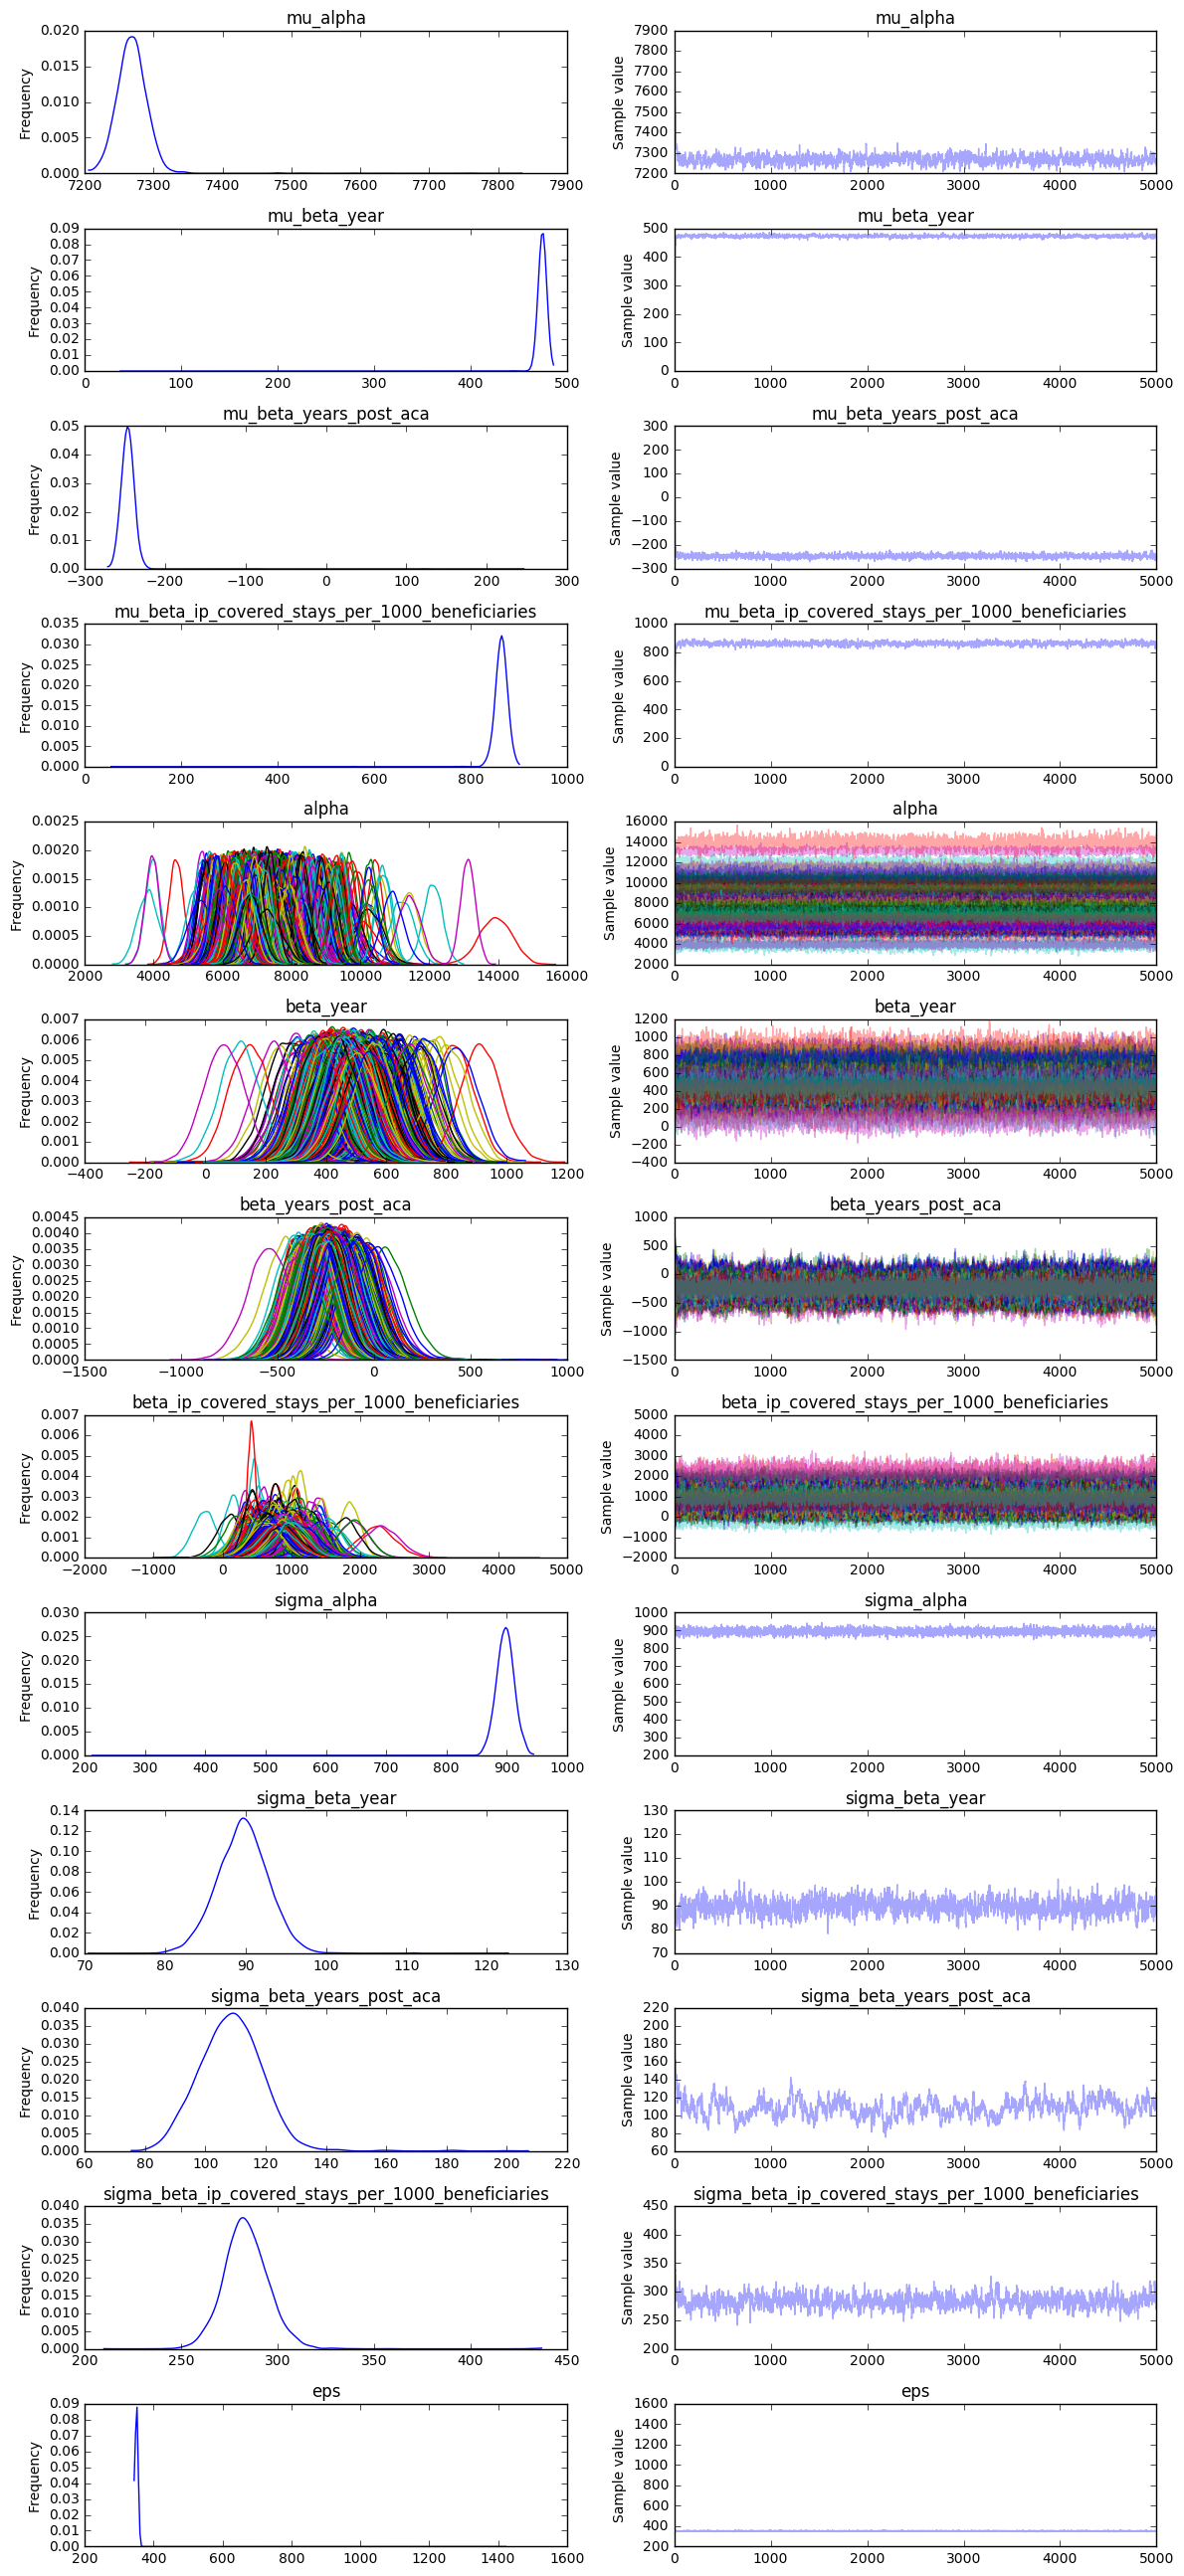

In [10]:
pm.traceplot(trace)

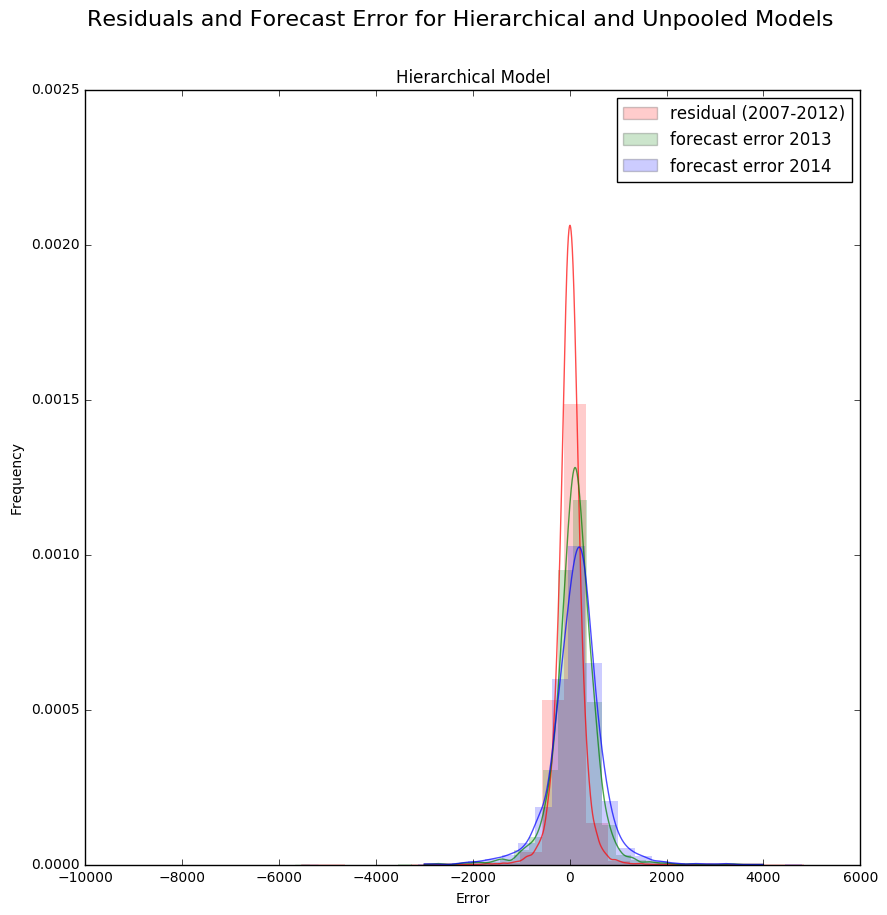

In [14]:
# Plot the residuals and forecast error
residuals = evaluation_df.loc[evaluation_df['year'] < 6, 'residuals']
residuals_density = gaussian_kde(residuals)
plot_res_density = residuals_density(range(-3000, 4000))
forecast_error_2013 = evaluation_df.loc[evaluation_df['year'] == 6, 'residuals']
forecast_error_2013_density = gaussian_kde(forecast_error_2013)
plot_forecast_error_2013_density = forecast_error_2013_density(range(-3000, 4000))
forecast_error_2014 = evaluation_df.loc[evaluation_df['year'] == 7, 'residuals']
forecast_error_2014_density = gaussian_kde(forecast_error_2014)
plot_forecast_error_2014_density = forecast_error_2014_density(range(-3000, 4000))
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.hist(residuals, color = 'r', alpha = 0.2, bins =30, label = 'residual (2007-2012)', edgecolor = 'none', normed = True)
ax.plot(range(-3000, 4000), plot_res_density, color = 'r', alpha = 0.7)
ax.hist(forecast_error_2013, color = 'g', alpha = 0.2, bins = 30, label = 'forecast error 2013', edgecolor = 'none', normed = True)
ax.plot(range(-3000, 4000), plot_forecast_error_2013_density, color = 'g', alpha = 0.7)
ax.hist(forecast_error_2014, color = 'b', alpha = 0.2, bins = 30, label = 'forecast error 2014', edgecolor = 'none', normed = True)
ax.plot(range(-3000, 4000), plot_forecast_error_2014_density, color = 'b', alpha = 0.7)
ax.legend()
ax.set_title('Hierarchical Model')
ax.set_ylabel('Frequency')
ax.set_xlabel('Error')
fig.suptitle('Residuals and Forecast Error for Hierarchical and Unpooled Models', fontsize = 16)
fig.show()

(2000, 18000)

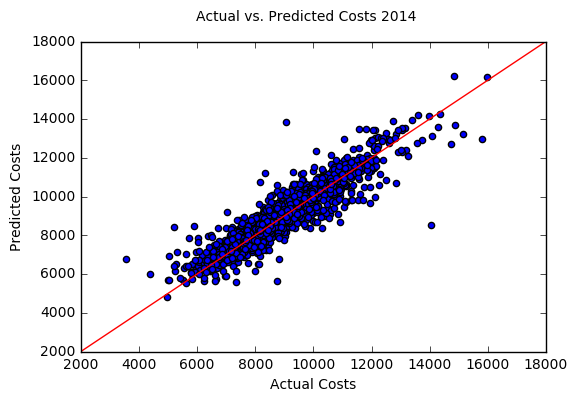

In [22]:
# Plot predictions vs. actual data
actual_costs = evaluation_df.loc[evaluation_df['year'] == 7, 'actual_per_capita_costs'].values
predicted_costs = evaluation_df.loc[evaluation_df['year'] == 7, 'predictions'].values
plt.scatter(actual_costs, predicted_costs)
plt.xlabel('Actual Costs')
plt.ylabel('Predicted Costs')
plt.plot(range(2000, 18000), range(2000, 18000), color = 'r')
plt.suptitle('Actual vs. Predicted Costs 2014')
plt.xlim(2000, 18000)
plt.ylim(2000, 18000)

,state_and_county_fips_code,year,years_post_aca,ip_covered_stays_per_1000_beneficiaries,actual_per_capita_costs,0,alpha_mean,alpha_upper_bound,alpha_lower_bound,beta_year_mean,beta_year_upper_bound,beta_year_lower_bound,beta_years_post_aca_mean,beta_years_post_aca_upper_bound,beta_years_post_aca_lower_bound,beta_ip_covered_stays_per_1000_beneficiaries_mean,beta_ip_covered_stays_per_1000_beneficiaries_upper_bound,beta_ip_covered_stays_per_1000_beneficiaries_lower_bound,predictions,residuals
0,2020,0.0,0.0,244.000000,6688.90000,67,6679.143915,8244.851565,6826.783994,449.540150,582.388387,318.863249,-266.375668,-78.176693,-455.236009,845.902380,1356.627050,331.125220,6679.143915,-9.756085
1,2050,0.0,0.0,316.000000,7563.27000,68,7481.033396,7904.503099,6963.152906,430.952820,564.257454,295.551084,-266.169421,-71.030971,-475.577024,1142.441231,1641.217467,674.871965,7481.033396,-82.236604
2,2060,0.0,0.0,206.000000,5874.40000,69,6088.216422,8753.223318,7033.248406,496.713354,620.729479,374.467819,-361.460934,-164.219529,-566.546596,1130.940519,1599.433084,665.925342,6088.216422,213.816422
3,2068,0.0,0.0,304.575749,8344.81477,70,7757.444411,8279.414895,7447.695148,292.036892,418.430086,160.255132,-316.634322,-117.863181,-513.697917,853.969447,1400.270436,319.433161,7757.444411,-587.370359
4,2070,0.0,0.0,279.000000,10271.41000,71,9484.539608,10783.163636,9746.001353,647.793844,779.162916,516.298108,61.807397,284.283284,-145.511282,1522.412595,1950.505060,1075.476049,9484.539608,-786.870392


In [24]:
from scipy.stats import pearsonr

In [25]:
pearsonr(evaluation_df['year'], evaluation_df['years_post_aca'])

(0.92213889195414689, 0.0)